In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('updated_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,...,Active_2,Active_3,Weight_1,Weight_2,Weight_3,WeightA_1,WeightA_2,WeightA_3,rating_weight,order_history_weight
0,0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,...,9.35,1.40,0.0143,0.1597,0.6128,0.9828,0.7823,0.7048,0.5644,0.4356
1,1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,...,2.64,10.08,0.5331,0.4526,0.4897,0.8654,0.6535,0.6569,0.6644,0.3356
2,2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,...,5.26,10.10,0.0872,0.4186,0.0201,0.9194,0.8707,0.8531,0.9219,0.0781
3,3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,...,11.81,13.23,0.5528,0.9088,0.6642,0.3195,0.5428,0.9207,0.3716,0.6284
4,4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,...,7.07,5.43,0.4019,0.9417,0.5699,0.0827,0.3017,0.1629,0.4708,0.5292


In [4]:
# df = df.dropna(axis = 1)

In [5]:
df.shape

(45593, 42)

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)',
       'Number of calls', 'Politeness', 'Freshness ', 'Temperature',
       'Maximum wait time', 'Class', 'initial_bid', 'Order_1', 'Order_2',
       'Order_3', 'Active_1', 'Active_2', 'Active_3', 'Weight_1', 'Weight_2',
       'Weight_3', 'WeightA_1', 'WeightA_2', 'WeightA_3', 'rating_weight',
       'order_history_weight'],
      dtype='object')

In [7]:
df = df.drop(['ID', 'Delivery_person_Age', 'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 
              'Type_of_order', 'multiple_deliveries', 'Festival', 'City'], axis = 1)

In [8]:
df.columns

Index(['Unnamed: 0', 'Delivery_person_ID', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Type_of_vehicle',
       'Time_taken(min)', 'Number of calls', 'Politeness', 'Freshness ',
       'Temperature', 'Maximum wait time', 'Class', 'initial_bid', 'Order_1',
       'Order_2', 'Order_3', 'Active_1', 'Active_2', 'Active_3', 'Weight_1',
       'Weight_2', 'Weight_3', 'WeightA_1', 'WeightA_2', 'WeightA_3',
       'rating_weight', 'order_history_weight'],
      dtype='object')

In [9]:
param = df[['Time_taken(min)',
       'Number of calls', 'Politeness', 'Freshness ', 'Temperature',
       'Maximum wait time']].to_numpy()

In [10]:
# param

In [11]:
# New formula 
# Update = (Maximum Wait Time - Time taken(min)) * 10 + Politeness * 5 + Freshness * 7 + Temperature * 6 + Number of Calls * 4
# Weights = [10, 5, 7, 6, 4]
# Number of calls would signify how many times the customer has to call a delivery person

In [12]:
# update - updates which are done in ratings on a scale on 1000. Will be scaled down to 1 eventually
update = np.empty((45593, 1), dtype = float)
for i in range(0, len(param)):
    update[i] = 10 * (param[i][5] - param[i][0]) + 5 * param[i][2] + 7 * param[i][3] + param[i][4] * 6 + 4 * param[i][1]
    
update.shape

(45593, 1)

In [13]:
# for i in range(0, len(update)):
#     print(update[i], "\n")

In [14]:
# Normalizing Customer Ratings
# Using Min-Max Normalization

normal_update = np.empty((45593, 1), dtype = float)
m = max(update)
n = min(update)
for i in range(0, len(param)):
    normal_update[i] = (m - update[i]) / (m - n)
    normal_update[i] = normal_update[i] * 5
    
# print(normal_update)
# print(max(normal_update))
# print(min(normal_update))

In [15]:
# Created in replacement of the Deliver_person_ID
id = np.empty((45593, 1), dtype = int)
for i in range(0, len(id)):
    id[i] = i + 1

In [16]:
# param.shape

In [17]:
# param[5]

In [18]:
rat = df['Delivery_person_Ratings'].to_numpy()
rat = rat.astype(np.float64)
# print(rat.dtype)

In [19]:
# for i in range(0, len(updated_ratings)):
#     print(updated_ratings[i], "\n")

In [20]:
# Plotting previous ratings and updated ratings

In [21]:
# plt.bar(df['id'], df['Delivery_person_Ratings'])
# plt.bar(df['id'], df['updated_ratings'])

In [22]:
df['normal_update'] = normal_update
# df['updated_ratings'] = updated_ratings
# df['updated_ratings']
# df['id'] = id
# x = df['updated_ratings'] - df['Delivery_person_Ratings']
# max(x)
# min(x)

In [23]:
# Finding p factor
p = df['Weight_1'] * df['Order_1'] + df['Weight_2'] * df['Order_2'] + df['Weight_3'] * df['Order_3'] + df['WeightA_1'] * df['Active_1'] + df['WeightA_2'] * df['Active_2'] + df['WeightA_3'] * df['Active_3']

In [24]:
# Finding factor a

a = df['order_history_weight'] * p + df['rating_weight'] * df['normal_update']

In [25]:
print(max(a))
print(min(a))

26148.0506735985
0.7064658027567043


In [48]:
for i in range(0, len(param)):
    update[i] = update[i] + (a[i] / 10000)
    
m = max(update)
n = min(update)
for i in range(0, len(param)):
    normal_update[i] = (m - update[i]) / (m - n)
    normal_update[i] = normal_update[i] * 5
    
df['normal_update'] = normal_update


In [49]:
# Updated Ratings of the rider
updated_ratings = np.empty((45593, 1), dtype = float)
for i in range(0, len(update)):
    updated_ratings[i] = rat[i] + (normal_update[i] / 10)
    if updated_ratings[i] > 5:
        updated_ratings[i] = 5
df['updated_ratings'] = updated_ratings

In [50]:
df.head()

,Unnamed: 0,Delivery_person_ID,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Weight_2,Weight_3,WeightA_1,WeightA_2,WeightA_3,rating_weight,order_history_weight,normal_update,machine_bid,updated_ratings
0,0,INDORES13DEL02,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,...,0.1597,0.6128,0.9828,0.7823,0.7048,0.5644,0.4356,2.957937,1.342768e-311,5.000000
1,1,BANGRES18DEL02,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,...,0.4526,0.4897,0.8654,0.6535,0.6569,0.6644,0.3356,3.065199,1.342769e-311,4.806520
2,2,BANGRES19DEL01,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,...,0.4186,0.0201,0.9194,0.8707,0.8531,0.9219,0.0781,2.186188,0.000000e+00,4.618619
3,3,COIMBRES13DEL02,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,...,0.9088,0.6642,0.3195,0.5428,0.9207,0.3716,0.6284,2.573011,0.000000e+00,4.957301
4,4,CHENRES12DEL01,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,...,0.9417,0.5699,0.0827,0.3017,0.1629,0.4708,0.5292,3.141786,-1.000000e+00,4.914179


In [51]:
import random

In [52]:
sample_size = 20

In [53]:
# Sampling without replacement
sample = df.sample(n = sample_size)
sample = sample.sort_values(by = ['updated_ratings'])

id = np.empty((sample_size, 1), dtype = int)
for i in range(0, len(id)):
    id[i] = i + 1
sample['id'] = id
# data_sorted = sorted(zip(x, y), key=lambda x: x[1])
# sample

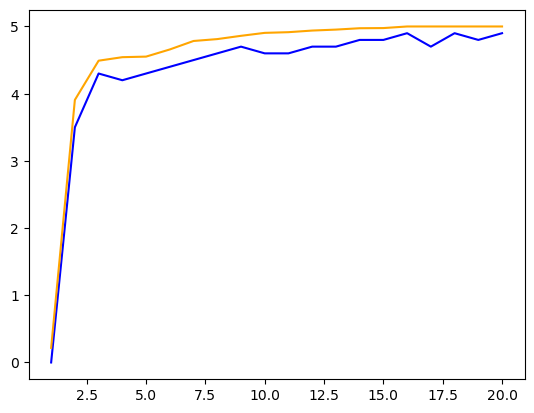

In [54]:
# Printing Line Chart
plt.plot(sample['id'], sample['Delivery_person_Ratings'], color = 'blue')
plt.plot(sample['id'], sample['updated_ratings'], color = 'orange')

<BarContainer object of 20 artists>

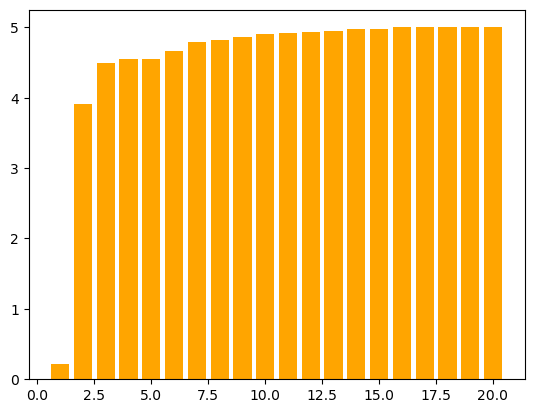

In [55]:
# Printing Bar Chart
plt.bar(sample['id'], sample['Delivery_person_Ratings'], color = 'blue')
plt.bar(sample['id'], sample['updated_ratings'], color = 'orange')

In [56]:
# Printing Machine Predicted Bid using rating as a parameter

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [58]:
X = pd.DataFrame(df.loc[:, ['Politeness', 'Temperature', 'Freshness ']])

In [59]:
# X

In [60]:
Y = df['Class']

In [61]:
# Y

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [63]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [64]:
y_pred = model.predict(X_test)
# y_pred

In [65]:
# Calculating the sigmoid
def sigmoid (value):
    return 1 / (1 + np.exp(-value))

In [66]:
# for i in range(0, len(percent_increase)):
#     print(percent_increase[i])

In [67]:
Price = 1000
min_bid = 100
max_bid = 200

In [68]:
bid = np.empty((45593, 1), dtype = float)
for i in range(0, len(bid)):
    x = sigmoid(updated_ratings[i] / 5)
    x = (x - 0.5) / 0.5
    bid[i] = x * (max_bid - min_bid) + min_bid
    bid[i] = sigmoid(bid[i])
    
print(min(bid))

a = (max_bid - min_bid) / (max(bid) - min(bid))
b = min_bid - a * min(bid)

for i in range(0, len(bid)):
    bid[i] = a * bid[i] + b

[1.]


C:\Users\UDAY MITTAL\AppData\Local\Temp\ipykernel_18488\3533062899.py:10: RuntimeWarning: divide by zero encountered in divide
  a = (max_bid - min_bid) / (max(bid) - min(bid))
C:\Users\UDAY MITTAL\AppData\Local\Temp\ipykernel_18488\3533062899.py:14: RuntimeWarning: invalid value encountered in add
  bid[i] = a * bid[i] + b


In [69]:
# Calculating the sigmoid of the update obtained in rating after applying the algorithm
percent_increase = np.empty((45593, 1), dtype = float)
for i in range(0, len(percent_increase)):
#     percent_increase[i] = sigmoid(updated_ratings[i] - rat[i])
    percent_increase[i] = sigmoid(updated_ratings[i])

In [70]:
# machine_bid indicating the bid predicted by the machine1
# Reason for 0.50. Machine predicted 
machine_bid = np.empty((45593, 1), dtype = float)
machine_bid = bid
c = 0
d = 0
# for i in range(0, len(machine_bid)):
# #     if percent_increase[i] > 0.5:
#     machine_bid[i] = df['initial_bid'][i] * (1 + percent_increase[i])
#     elif percent_increase[i] == 0.5:
#         machine_bid[i] = df['initial_bid'][i]
#         d = d + 1
#     else:
#         machine_bid[i] = df['initial_bid'][i] - df['initial_bid'][i] * percent_increase[i]
#         c = c + 1

In [71]:
# for i in range(0, len(machine_bid)):
#     print(machine_bid[i])
print(c, d)

0 0


In [72]:
df['machine_bid'] = machine_bid

In [73]:
# plt.plot(df['machine_bid'], df['updated_ratings'])

In [74]:
sample_size = 100
sample = df.sample(n = sample_size)

# change refers to the change in the rating of the rider

id = np.empty((sample_size, 1), dtype = int)
for i in range(0, len(id)):
    id[i] = i + 1
sample['id'] = id
sample['change'] = sample['updated_ratings'] - sample['Delivery_person_Ratings']
sample = sample.sort_values(by = ['change'])
# data_sorted = sorted(zip(x, y), key=lambda x: x[1])
# sample

Text(0, 0.5, 'Machine Predicted Bid')

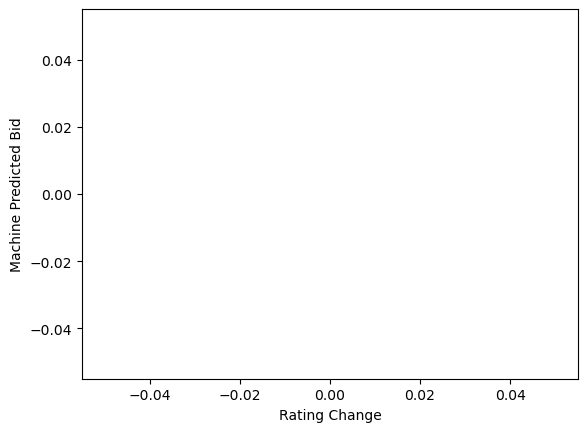

In [75]:
plt.plot(sample['change'], sample['machine_bid'], color = 'blue')
plt.xlabel('Rating Change')
plt.ylabel('Machine Predicted Bid')

Text(0, 0.5, 'Machine Predicted Bid')

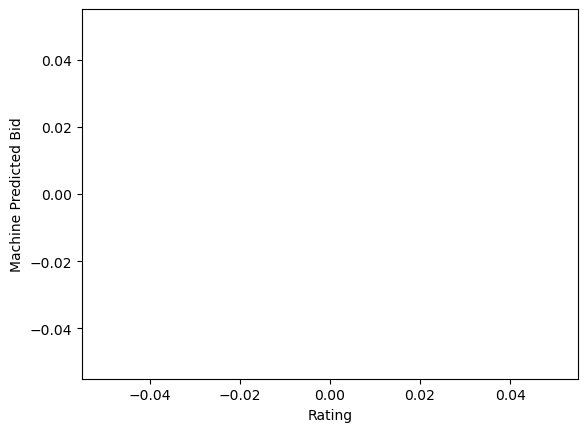

In [76]:
# x = sample('updated_ratings')
# sample.sort_values(by = ['updated_ratings'])
plt.plot(sample['updated_ratings'], sample['machine_bid'], color = 'blue')
plt.xlabel('Rating')
plt.ylabel('Machine Predicted Bid')